In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
df = pd.read_csv('data/phoenix_apartment.csv')

In [164]:
df = df.drop('Unnamed: 0', axis=1)

In [165]:
df.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,1327,apartment,1204,3,2.0,1,1,0,0,0,0,NaN,NaN
1,789,apartment,585,1,1.0,1,1,1,0,0,0,laundry on site,carport
2,1576,apartment,1360,2,2.0,1,1,1,0,0,0,w/d in unit,carport
3,925,apartment,744,1,1.0,0,0,1,0,0,0,NaN,NaN
4,1310,apartment,726,1,1.0,0,0,1,0,0,0,NaN,NaN


<AxesSubplot:xlabel='sqfeet', ylabel='price'>

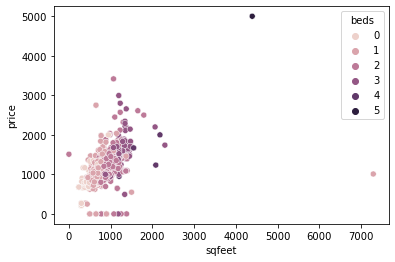

In [166]:
sns.scatterplot(x='sqfeet', y='price', hue='beds', data=df)

In [167]:
# see number of beds in the dataset 0 means studio
df['beds'].value_counts()

2    830
1    694
3    153
0    110
4      5
5      1
Name: beds, dtype: int64

110 studio apartments

In [168]:
df[df['beds'] == 0]

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
42,805,apartment,786,0,1.0,1,1,1,0,0,0,w/d in unit,carport
55,209,apartment,300,0,1.0,1,1,0,1,0,1,laundry on site,NaN
59,695,apartment,475,0,1.0,1,1,1,0,0,0,NaN,NaN
73,268,apartment,300,0,1.0,1,1,0,0,0,1,NaN,NaN
78,679,apartment,240,0,1.0,0,0,1,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,268,apartment,300,0,1.0,1,1,0,0,0,1,laundry on site,NaN
1637,695,apartment,475,0,1.0,1,1,1,0,0,0,NaN,NaN
1652,268,apartment,300,0,1.0,1,1,0,0,0,1,laundry on site,NaN
1731,795,apartment,491,0,1.0,1,1,1,0,0,0,w/d in unit,off-street parking


In [169]:
df[df['price'] > 4000]

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
105,5000,apartment,4391,5,4.0,0,0,1,0,0,0,NaN,NaN


In [170]:
df[df['sqfeet'] > 4000]

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
105,5000,apartment,4391,5,4.0,0,0,1,0,0,0,NaN,NaN
1078,1010,apartment,7290,1,1.0,1,1,1,0,0,0,w/d in unit,carport


Drop outlier of 1 bed 1 bath appartment with 7290 squarefeet

In [171]:
df = df.drop(index=1078)

In [172]:
df[df['sqfeet'] > 4000]

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
105,5000,apartment,4391,5,4.0,0,0,1,0,0,0,NaN,NaN


<AxesSubplot:xlabel='sqfeet', ylabel='price'>

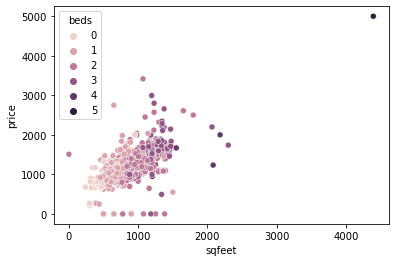

In [173]:
sns.scatterplot(x='sqfeet', y='price', data=df, hue='beds')

In [174]:
df['type'].unique()

array(['apartment'], dtype=object)

<AxesSubplot:xlabel='price', ylabel='Count'>

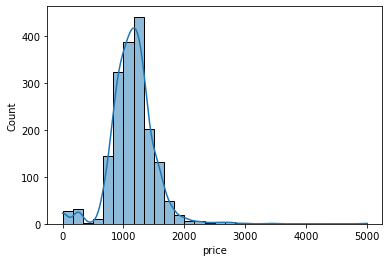

In [175]:
sns.histplot(data=df, x='price', bins=30, kde=True)

Look at different types of laundry classifications and make them uniform

In [176]:
df['laundry_options'].value_counts()

w/d in unit           905
laundry on site       289
w/d hookups            14
laundry in bldg         9
no laundry on site      2
Name: laundry_options, dtype: int64

In [177]:
df['laundry_options'].isna().sum()

573

In [178]:
df['laundry_options'] = df['laundry_options'].fillna('no laundry on site')

In [179]:
df['laundry_options'].value_counts()

w/d in unit           905
no laundry on site    575
laundry on site       289
w/d hookups            14
laundry in bldg         9
Name: laundry_options, dtype: int64

In [180]:
df['laundry_options'].isna().sum()

0

Look at parking classifications and make uniform

In [181]:
df['parking_options'].value_counts()

carport               749
off-street parking    118
detached garage        82
attached garage        61
street parking          2
Name: parking_options, dtype: int64

In [182]:
df['parking_options'].isna().sum()

780

In [118]:
df.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.669736,0.523879,0.449506,0.049754,0.042007,-0.004796,0.076623,0.119539,-0.224115
sqfeet,0.669736,1.000000,0.811816,0.699895,-0.000485,-0.008156,0.037264,0.009308,0.017197,-0.216754
beds,0.523879,0.811816,1.000000,0.719144,0.017602,0.014744,0.029741,0.006167,0.019377,-0.208524
baths,0.449506,0.699895,0.719144,1.000000,-0.026783,-0.032079,-0.042701,0.013592,0.005993,-0.116911
cats_allowed,0.049754,-0.000485,0.017602,-0.026783,1.000000,0.982852,-0.117264,0.164217,0.034759,0.100437
dogs_allowed,0.042007,-0.008156,0.014744,-0.032079,0.982852,1.000000,-0.110000,0.165159,0.034958,0.101075
smoking_allowed,-0.004796,0.037264,0.029741,-0.042701,-0.117264,-0.110000,1.000000,-0.216771,-0.014055,-0.258241
wheelchair_access,0.076623,0.009308,0.006167,0.013592,0.164217,0.165159,-0.216771,1.000000,0.097896,0.240402
electric_vehicle_charge,0.119539,0.017197,0.019377,0.005993,0.034759,0.034958,-0.014055,0.097896,1.000000,-0.010410
comes_furnished,-0.224115,-0.216754,-0.208524,-0.116911,0.100437,0.101075,-0.258241,0.240402,-0.010410,1.000000


In [119]:
len(df)

1792

In [27]:
780/1792

0.43526785714285715

In [28]:
# Drop parking column
df = df.drop('parking_options', axis=1)

In [29]:
df = df.drop('type', axis=1)

In [30]:
df.to_csv('data/phoenix_apartments_final', index=False)

In [31]:
new_df = pd.read_csv('data/phoenix_apartments_final')

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1792 non-null   int64  
 1   sqfeet                   1792 non-null   int64  
 2   beds                     1792 non-null   int64  
 3   baths                    1792 non-null   float64
 4   cats_allowed             1792 non-null   int64  
 5   dogs_allowed             1792 non-null   int64  
 6   smoking_allowed          1792 non-null   int64  
 7   wheelchair_access        1792 non-null   int64  
 8   electric_vehicle_charge  1792 non-null   int64  
 9   comes_furnished          1792 non-null   int64  
 10  laundry_options          1792 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 154.1+ KB


In [33]:
# Select all string categories for conversion
new_df.select_dtypes(include='object')

,laundry_options
0,no laundry on site
1,laundry on site
2,w/d in unit
3,no laundry on site
4,no laundry on site
...,...
1787,no laundry on site
1788,no laundry on site
1789,w/d in unit
1790,laundry on site


In [34]:
my_object_df = new_df.select_dtypes(include='object')

In [35]:
my_numeric_df = new_df.select_dtypes(exclude='object')

In [36]:
my_numeric_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1327,1204,3,2.0,1,1,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1787,1525,965,2,2.0,0,0,1,0,0,0
1788,1180,689,1,1.0,0,0,1,0,0,0
1789,1165,707,1,1.0,1,1,1,0,0,0
1790,1205,840,2,1.0,1,1,1,0,0,0


In [37]:
# Only edit string objects and then concat both numeric and cat back together
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [38]:
df_objects_dummies

,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1787,0,1,0,0
1788,0,1,0,0
1789,0,0,0,1
1790,1,0,0,0


In [39]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1) 

In [40]:
final_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1525,965,2,2.0,0,0,1,0,0,0,0,1,0,0
1788,1180,689,1,1.0,0,0,1,0,0,0,0,1,0,0
1789,1165,707,1,1.0,1,1,1,0,0,0,0,0,0,1
1790,1205,840,2,1.0,1,1,1,0,0,0,1,0,0,0


In [41]:
final_df.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
price,1.000000,0.669736,0.523879,0.449506,0.049754,0.042007,-0.004796,0.076623,0.119539,-0.224115,-0.331886,-0.049548,-0.020786,0.305401
sqfeet,0.669736,1.000000,0.811816,0.699895,-0.000485,-0.008156,0.037264,0.009308,0.017197,-0.216754,-0.275542,-0.059092,0.040682,0.255215
beds,0.523879,0.811816,1.000000,0.719144,0.017602,0.014744,0.029741,0.006167,0.019377,-0.208524,-0.128805,-0.059598,0.032488,0.145043
baths,0.449506,0.699895,0.719144,1.000000,-0.026783,-0.032079,-0.042701,0.013592,0.005993,-0.116911,-0.186274,-0.050580,0.021345,0.182666
cats_allowed,0.049754,-0.000485,0.017602,-0.026783,1.000000,0.982852,-0.117264,0.164217,0.034759,0.100437,0.194166,-0.680026,0.024474,0.481757
dogs_allowed,0.042007,-0.008156,0.014744,-0.032079,0.982852,1.000000,-0.110000,0.165159,0.034958,0.101075,0.202721,-0.680141,0.010525,0.477993
smoking_allowed,-0.004796,0.037264,0.029741,-0.042701,-0.117264,-0.110000,1.000000,-0.216771,-0.014055,-0.258241,-0.012510,0.101187,0.028821,-0.093610
wheelchair_access,0.076623,0.009308,0.006167,0.013592,0.164217,0.165159,-0.216771,1.000000,0.097896,0.240402,-0.036686,-0.164760,-0.024299,0.174703
electric_vehicle_charge,0.119539,0.017197,0.019377,0.005993,0.034759,0.034958,-0.014055,0.097896,1.000000,-0.010410,-0.025416,-0.039840,-0.005143,0.057382
comes_furnished,-0.224115,-0.216754,-0.208524,-0.116911,0.100437,0.101075,-0.258241,0.240402,-0.010410,1.000000,0.191578,-0.041008,-0.015937,-0.098026


<AxesSubplot:>

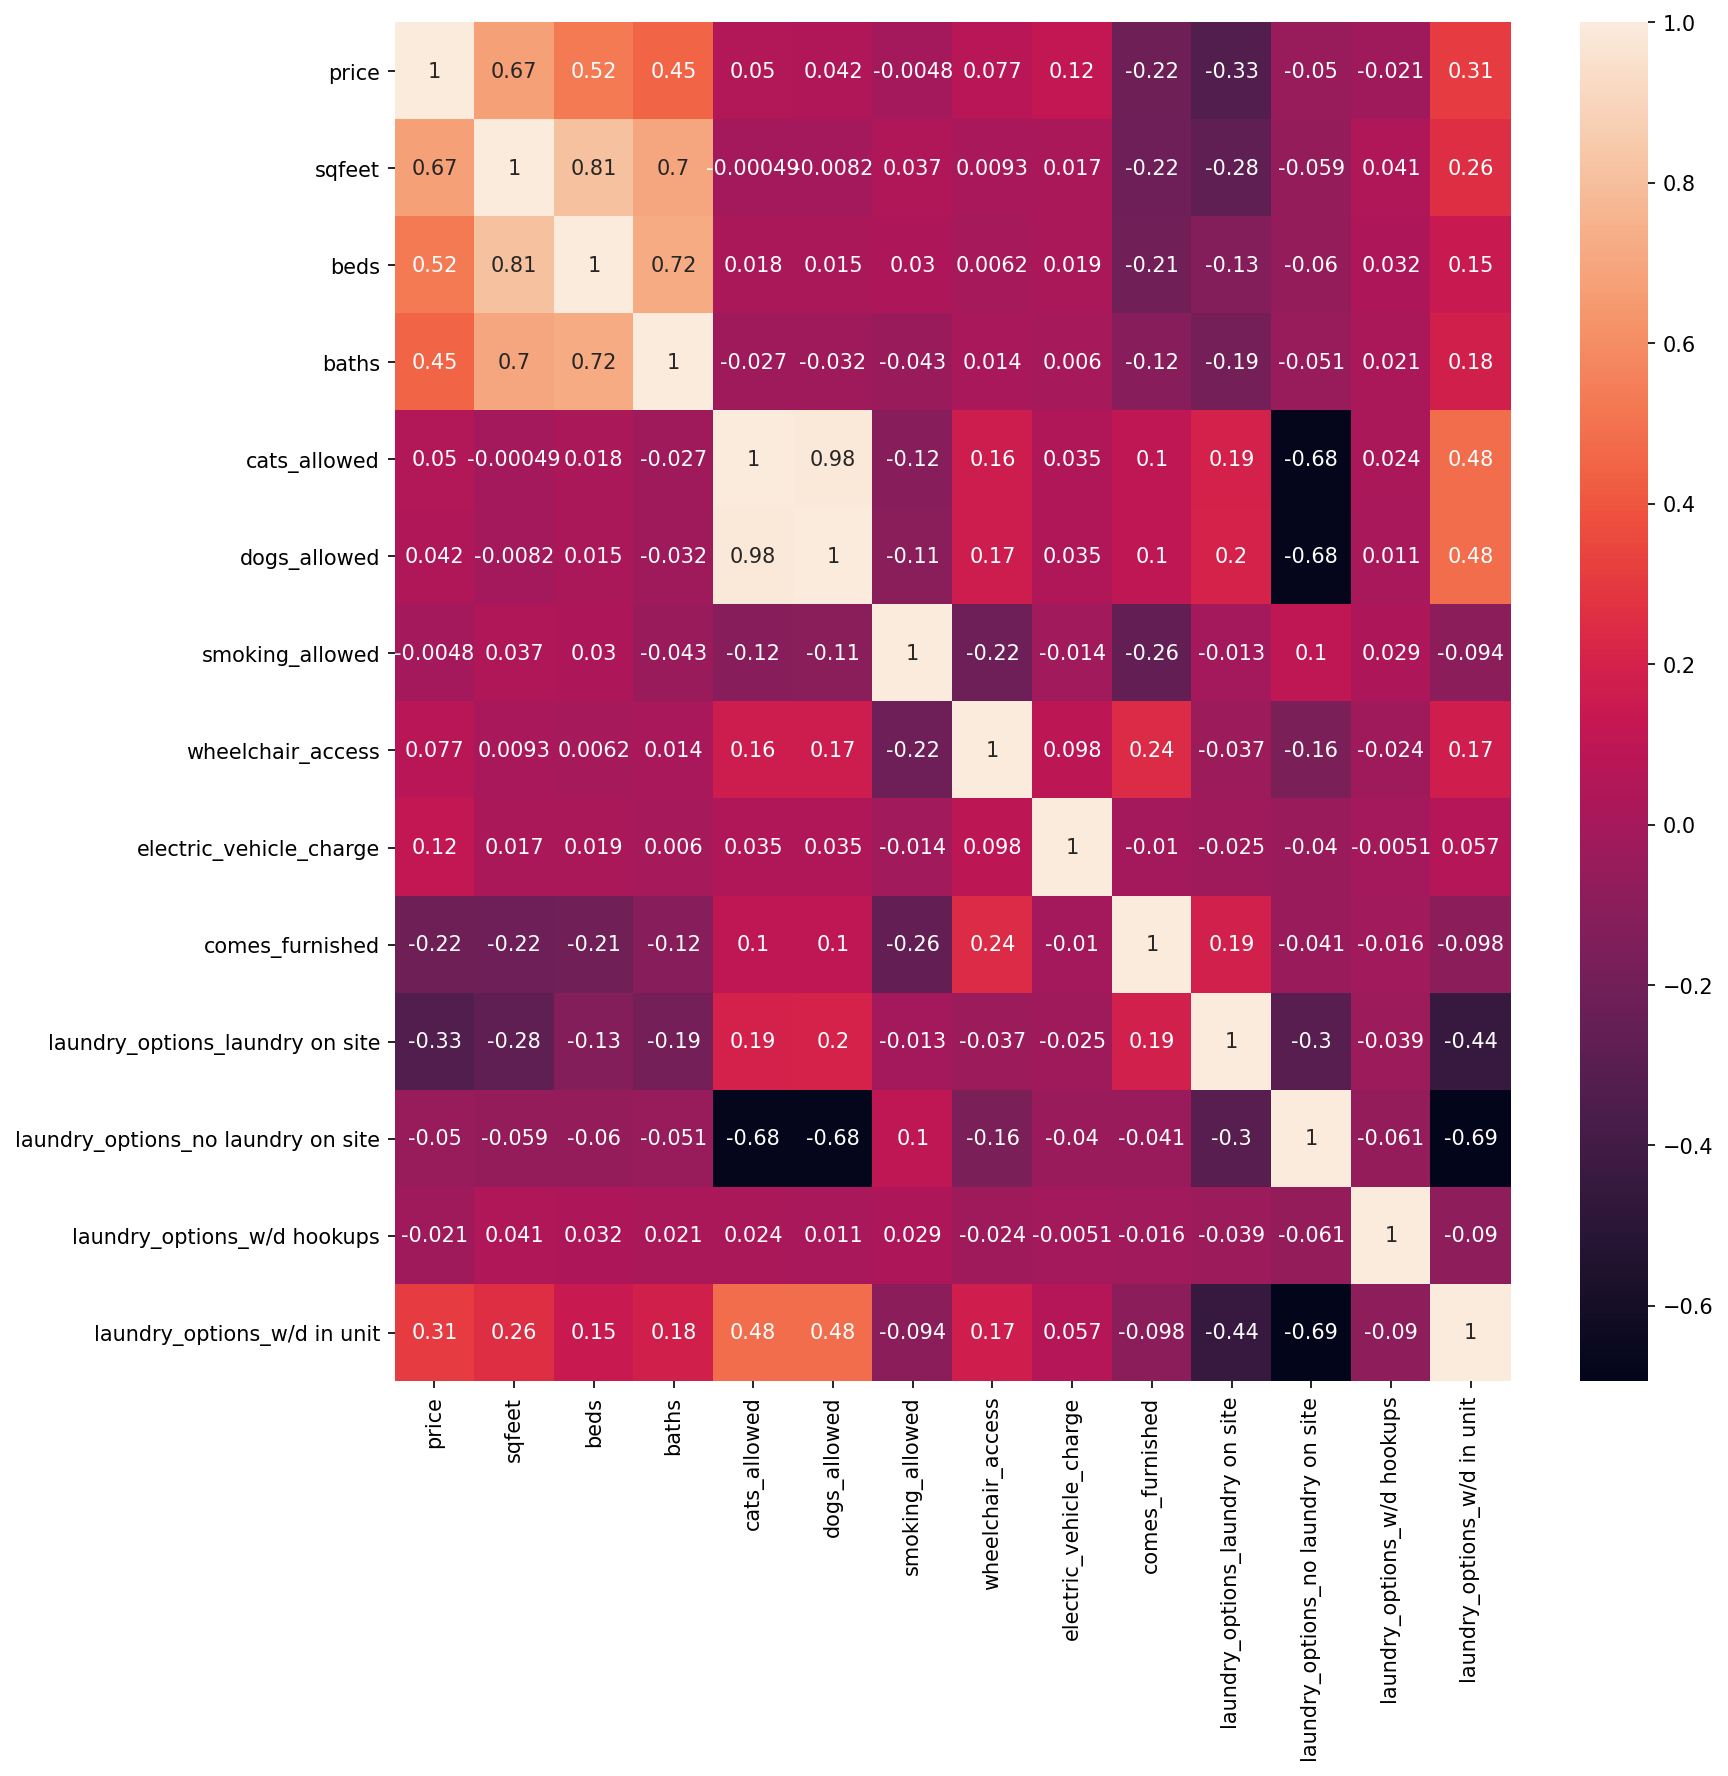

In [42]:
plt.figure(figsize=(12,12), dpi=150)
sns.heatmap(final_df.corr(), annot=True)

In [43]:
final_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0


In [49]:
drop_rows = final_df[final_df['price'] == 0].index

In [50]:
drop_rows

Int64Index([  43,  117,  179,  184,  204,  225,  236,  261,  416,  447,  720,
             777,  937,  993, 1007, 1041, 1342, 1395, 1498, 1513, 1529, 1550,
            1585, 1624, 1756],
           dtype='int64')

In [52]:
final_df = final_df.drop(drop_rows)

In [55]:
final_df[final_df['price'] >0]

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1525,965,2,2.0,0,0,1,0,0,0,0,1,0,0
1788,1180,689,1,1.0,0,0,1,0,0,0,0,1,0,0
1789,1165,707,1,1.0,1,1,1,0,0,0,0,0,0,1
1790,1205,840,2,1.0,1,1,1,0,0,0,1,0,0,0


In [56]:
final_df.to_csv('data/final_apartment.csv')

# encode parking and washing

In [183]:
len(final_df)

1767

In [184]:
len(df)

1792

In [185]:
len(drop_rows)

25

In [186]:
df = df.drop(drop_rows) # drop price outliers

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1792
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1767 non-null   int64  
 1   type                     1767 non-null   object 
 2   sqfeet                   1767 non-null   int64  
 3   beds                     1767 non-null   int64  
 4   baths                    1767 non-null   float64
 5   cats_allowed             1767 non-null   int64  
 6   dogs_allowed             1767 non-null   int64  
 7   smoking_allowed          1767 non-null   int64  
 8   wheelchair_access        1767 non-null   int64  
 9   electric_vehicle_charge  1767 non-null   int64  
 10  comes_furnished          1767 non-null   int64  
 11  laundry_options          1767 non-null   object 
 12  parking_options          1001 non-null   object 
dtypes: float64(1), int64(9), object(3)
memory usage: 193.3+ KB


,type,laundry_options,parking_options
0,apartment,no laundry on site,NaN
1,apartment,laundry on site,carport
2,apartment,w/d in unit,carport
3,apartment,no laundry on site,NaN
4,apartment,no laundry on site,NaN
...,...,...,...
1788,apartment,no laundry on site,NaN
1789,apartment,no laundry on site,NaN
1790,apartment,w/d in unit,carport
1791,apartment,laundry on site,carport


In [188]:
# Fill parking options 
df.parking_options.isna().sum()

766

In [189]:
df['parking_options'] = df['parking_options'].fillna('No parking information')

In [190]:
df['parking_options'].isna().sum()

0

In [191]:
parking_options = df['parking_options']

In [192]:
parking_options

0       No parking information
1                      carport
2                      carport
3       No parking information
4       No parking information
                 ...          
1788    No parking information
1789    No parking information
1790                   carport
1791                   carport
1792    No parking information
Name: parking_options, Length: 1767, dtype: object

In [204]:
parking_options.unique()

array(['No parking information', 'carport', 'off-street parking',
       'detached garage', 'attached garage', 'street parking'],
      dtype=object)

In [193]:
laundry_options = df['laundry_options']

In [194]:
laundry_options

0       no laundry on site
1          laundry on site
2              w/d in unit
3       no laundry on site
4       no laundry on site
               ...        
1788    no laundry on site
1789    no laundry on site
1790           w/d in unit
1791       laundry on site
1792    no laundry on site
Name: laundry_options, Length: 1767, dtype: object

In [207]:
laundry_options.unique()

array(['no laundry on site', 'laundry on site', 'w/d in unit',
       'w/d hookups', 'laundry in bldg'], dtype=object)

In [195]:
my_numeric_df = df.select_dtypes(exclude='object')

In [196]:
my_numeric_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1327,1204,3,2.0,1,1,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1788,1525,965,2,2.0,0,0,1,0,0,0
1789,1180,689,1,1.0,0,0,1,0,0,0
1790,1165,707,1,1.0,1,1,1,0,0,0
1791,1205,840,2,1.0,1,1,1,0,0,0


In [197]:
laundry_options_objects = pd.get_dummies(laundry_options, drop_first=True)

In [205]:
parking_options_object = pd.get_dummies(parking_options, drop_first=True)

In [199]:
laundry_options_objects

,laundry on site,no laundry on site,w/d hookups,w/d in unit
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1788,0,1,0,0
1789,0,1,0,0
1790,0,0,0,1
1791,1,0,0,0


In [206]:
parking_options_object

,attached garage,carport,detached garage,off-street parking,street parking
0,0,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1788,0,0,0,0,0
1789,0,0,0,0,0
1790,0,1,0,0,0
1791,0,1,0,0,0


,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1788,0,1,0,0,0,0,0,0,0
1789,0,1,0,0,0,0,0,0,0
1790,0,0,0,1,0,1,0,0,0
1791,1,0,0,0,0,1,0,0,0


In [208]:
final_df = pd.concat([my_numeric_df, laundry_options_objects, parking_options_object], axis=1) 

In [209]:
final_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry on site,no laundry on site,w/d hookups,w/d in unit,attached garage,carport,detached garage,off-street parking,street parking
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,1525,965,2,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1789,1180,689,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1790,1165,707,1,1.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
1791,1205,840,2,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [228]:
final_df.to_csv('data/final_apartment.csv', index=False)

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [221]:
model = LinearRegression()

In [222]:
X = final_df.drop('price', axis=1)
y = final_df['price']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [224]:
model.fit(X_train, y_train)

LinearRegression()

In [225]:
y_preds = model.predict(X_test)

In [226]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [227]:
r2_score(y_test, y_preds)

0.6337029028773378

## Test to see if adding in parking options will improve baseline model

In [65]:
df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options
0,1327,1204,3,2.0,1,1,0,0,0,0,no laundry on site
1,789,585,1,1.0,1,1,1,0,0,0,laundry on site
2,1576,1360,2,2.0,1,1,1,0,0,0,w/d in unit
3,925,744,1,1.0,0,0,1,0,0,0,no laundry on site
4,1310,726,1,1.0,0,0,1,0,0,0,no laundry on site
...,...,...,...,...,...,...,...,...,...,...,...
1788,1525,965,2,2.0,0,0,1,0,0,0,no laundry on site
1789,1180,689,1,1.0,0,0,1,0,0,0,no laundry on site
1790,1165,707,1,1.0,1,1,1,0,0,0,w/d in unit
1791,1205,840,2,1.0,1,1,1,0,0,0,laundry on site


In [66]:
df = df.drop('type', axis=1)

KeyError: "['type'] not found in axis"

In [67]:
df['parking_options'] = df['parking_options'].fillna('None')



KeyError: 'parking_options'

In [162]:
df['parking_options'].unique()

array(['None', 'carport', 'off-street parking', 'detached garage',
       'attached garage', 'street parking'], dtype=object)

In [163]:
df['parking_options'].isna().sum()

0

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 1792
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1792 non-null   int64  
 1   sqfeet                   1792 non-null   int64  
 2   beds                     1792 non-null   int64  
 3   baths                    1792 non-null   float64
 4   cats_allowed             1792 non-null   int64  
 5   dogs_allowed             1792 non-null   int64  
 6   smoking_allowed          1792 non-null   int64  
 7   wheelchair_access        1792 non-null   int64  
 8   electric_vehicle_charge  1792 non-null   int64  
 9   comes_furnished          1792 non-null   int64  
 10  laundry_options          1792 non-null   object 
 11  parking_options          1792 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 182.0+ KB


In [166]:
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')

In [167]:
my_numeric_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1327,1204,3,2.0,1,1,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1788,1525,965,2,2.0,0,0,1,0,0,0
1789,1180,689,1,1.0,0,0,1,0,0,0
1790,1165,707,1,1.0,1,1,1,0,0,0
1791,1205,840,2,1.0,1,1,1,0,0,0


In [168]:
my_object_df

,laundry_options,parking_options
0,no laundry on site,None
1,laundry on site,carport
2,w/d in unit,carport
3,no laundry on site,None
4,no laundry on site,None
...,...,...
1788,no laundry on site,None
1789,no laundry on site,None
1790,w/d in unit,carport
1791,laundry on site,carport


In [169]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [170]:
df_objects_dummies

,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1788,0,1,0,0,0,0,0,0,0
1789,0,1,0,0,0,0,0,0,0
1790,0,0,0,1,0,1,0,0,0
1791,1,0,0,0,0,1,0,0,0


In [171]:
full_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1) 

In [172]:
full_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,1525,965,2,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1789,1180,689,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1790,1165,707,1,1.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
1791,1205,840,2,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [183]:
X = full_df.drop('price', axis=1)
y = full_df['price']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
linear = LinearRegression()
scaler = StandardScaler()

In [187]:
scaler.fit(X_train)

StandardScaler()

In [188]:
scaled_X_train  = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [189]:
linear.fit(scaled_X_train, y_train)

LinearRegression()

In [192]:
y_preds = linear.predict(scaled_X_test)

In [193]:
r2_score(y_test, y_preds)

0.47595049739341266

<AxesSubplot:>

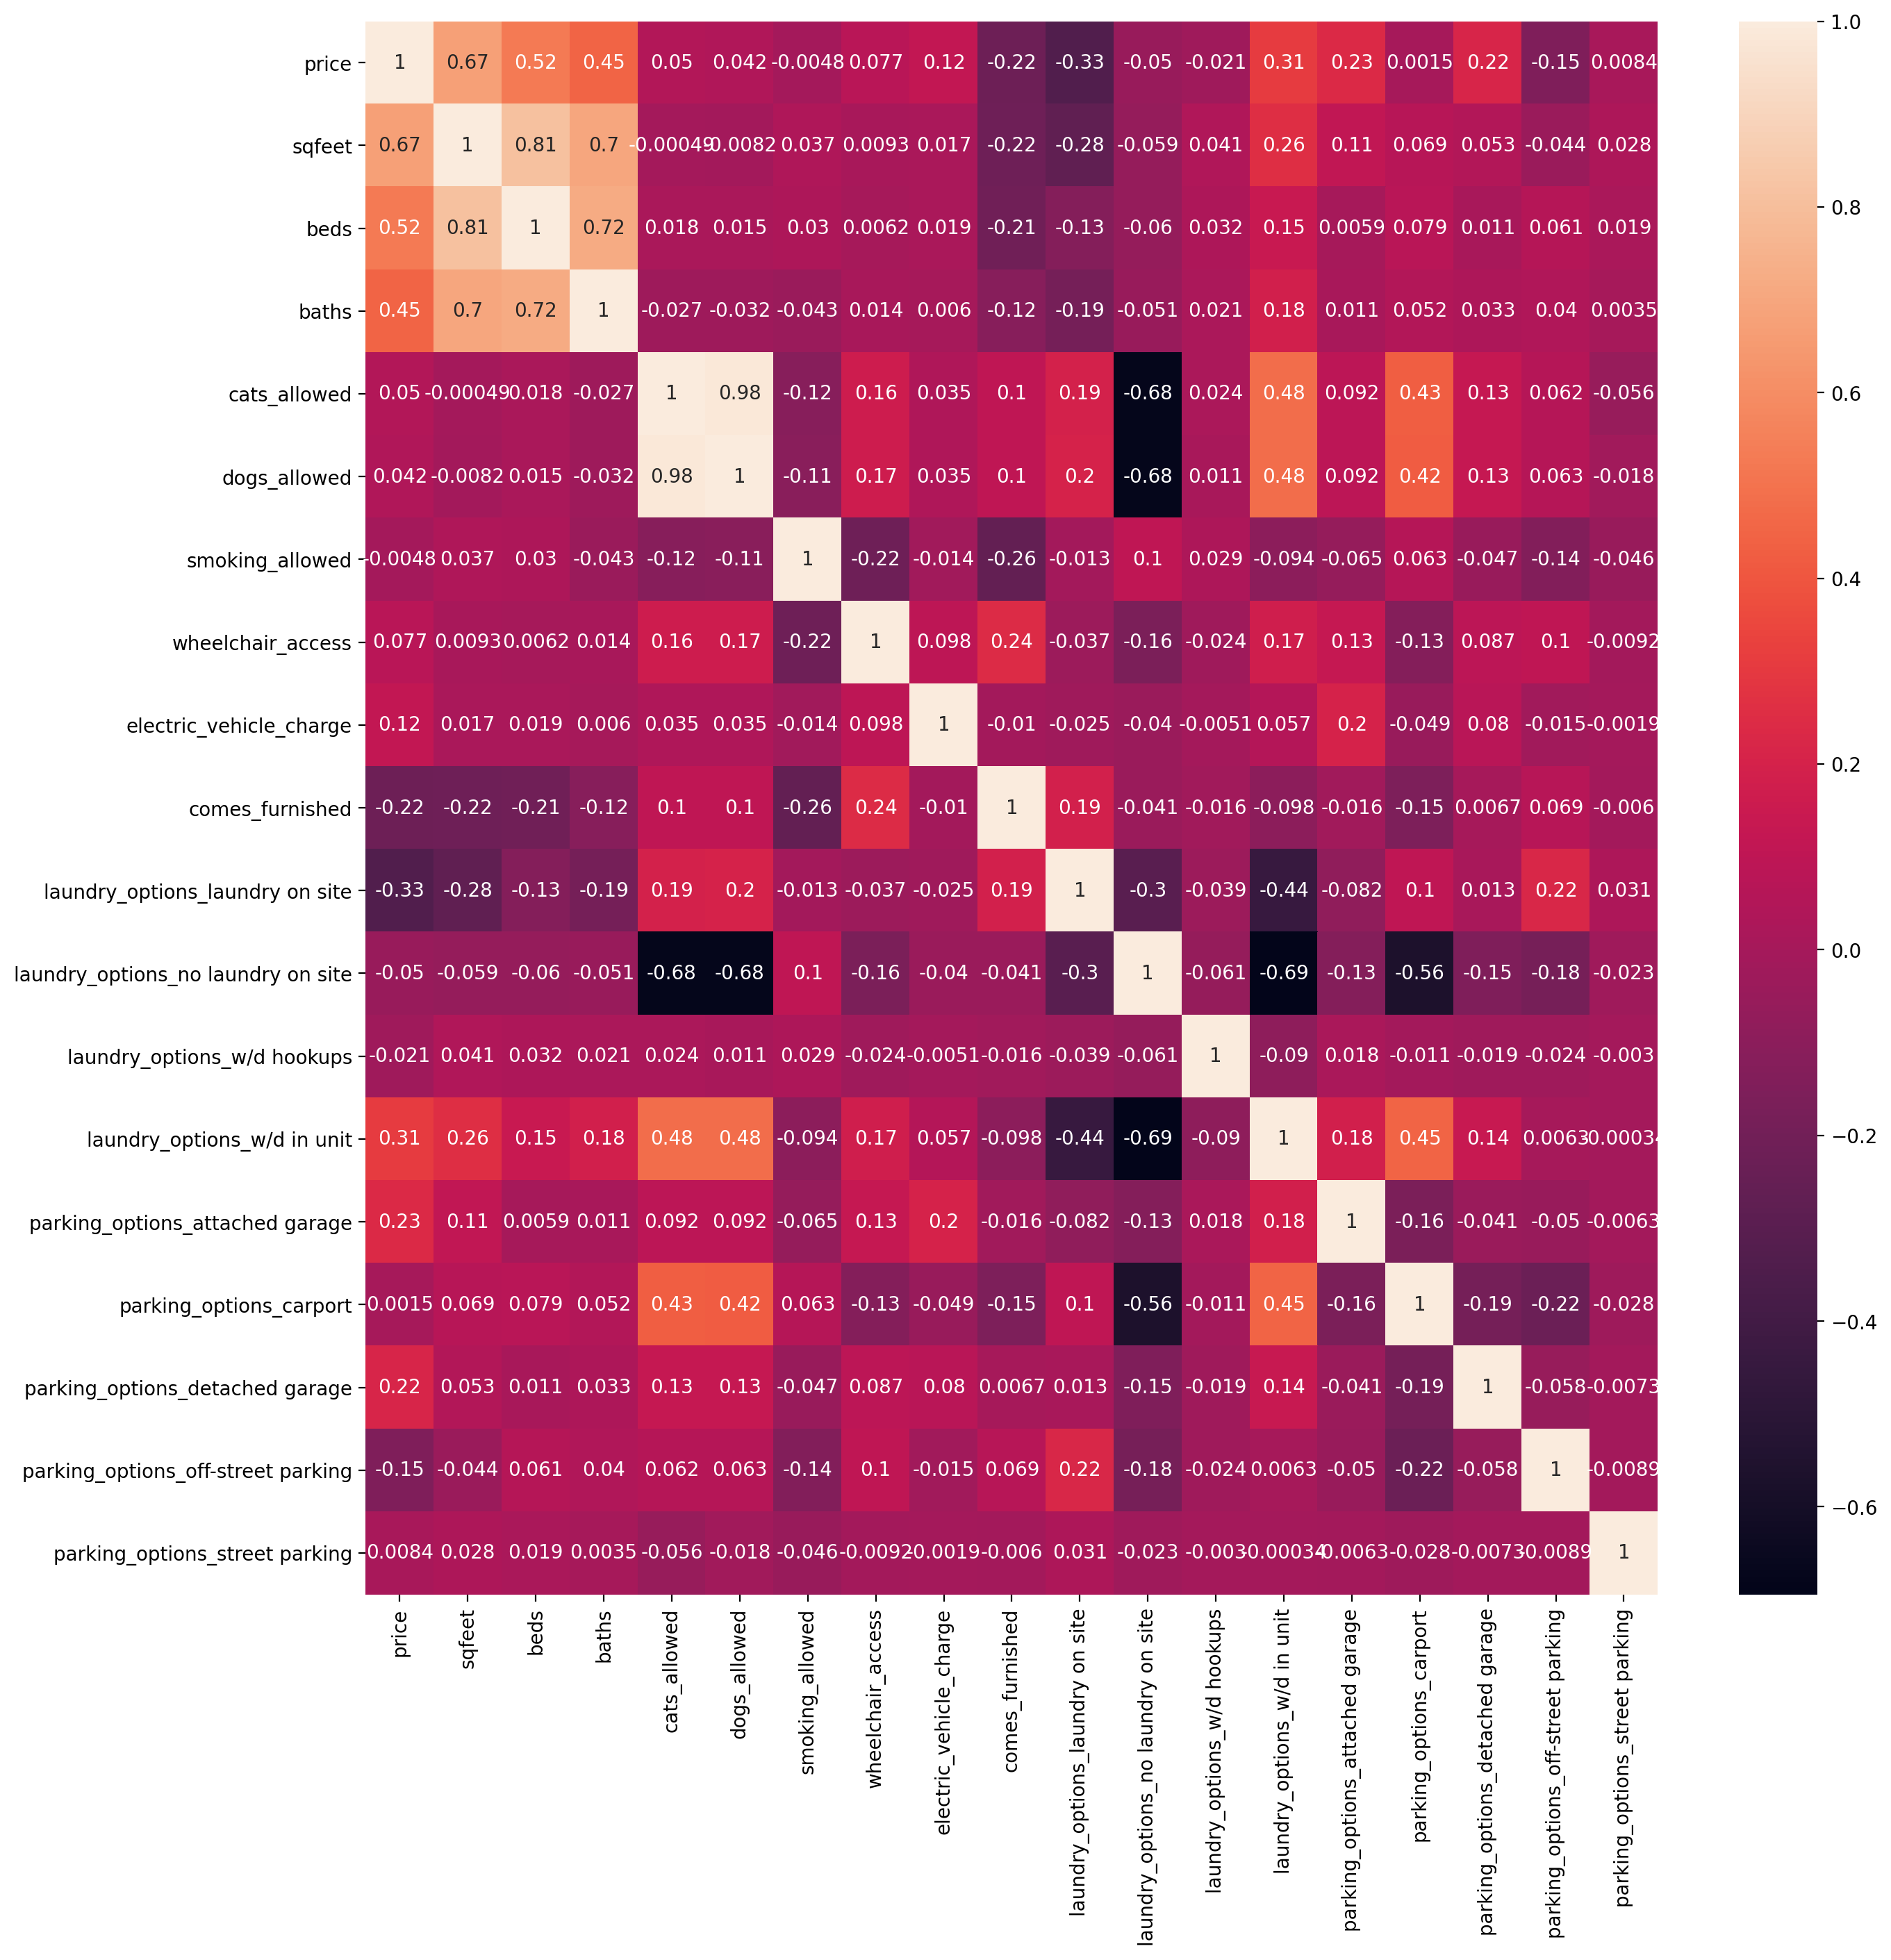

In [181]:
plt.figure(figsize=(15,15), dpi=200)
sns.heatmap(full_df.corr(), annot=True)

In [182]:
full_df.to_csv('data/final_apartment.csv')

In [68]:
from sklearn.linear_model import Ridge

# Baseline predictions

## Ridge predictions with no real tuning

In [69]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)

In [70]:
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [71]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [72]:
ridge = Ridge(alpha=100)

In [73]:
from sklearn.model_selection import cross_validate

In [74]:
scores = cross_validate(model, X_train, y_train, scoring=['neg_mean_absolute_error', 'r2',
                                                       'neg_mean_squared_error'], cv=10)


In [75]:
scores = pd.DataFrame(scores)

In [76]:
scores.mean()

fit_time                            0.001133
score_time                          0.001052
test_neg_mean_absolute_error     -151.522195
test_r2                             0.523044
test_neg_mean_squared_error    -54242.723915
dtype: float64

## Tune Ridge Regression

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
tune_ridge = Ridge()

In [82]:
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [83]:
ridge_grid = GridSearchCV(tune_ridge, param_grid=params_Ridge, n_jobs=-1)

In [84]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [85]:
ridge_grid.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}

In [86]:
tune_ridge_preds = ridge_grid.predict(X_eval)

In [87]:
r2_score(y_eval, tune_ridge_preds)

0.5141860306738166

In [88]:
mean_absolute_error(y_eval, tune_ridge_preds)

149.25425432626415

## Cross validate tuned ridge scores

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
ridge_model = Ridge(**ridge_grid.best_params_)

In [91]:
ridge_model.

SyntaxError: invalid syntax (<ipython-input-91-faa16b27c113>, line 1)

In [92]:
scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

In [93]:
scores.mean()

0.5176675309369588

In [94]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, solver='saga')

In [95]:
ridge_model_preds = ridge_model.predict(X_eval)

In [96]:
mean_absolute_error(y_eval, ridge_model_preds)

149.25613520403107

## ElasticNet with Grid Search

In [97]:
from sklearn.linear_model import ElasticNet

In [303]:
X = full_df.drop('price', axis=1)
y = full_df['price']

In [304]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [305]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [306]:
base_elastic_net_model = ElasticNet()

In [307]:
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100], 'l1_ratio': [.1, .5, .7, .95, .99, 1]}

In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
grid_model = GridSearchCV(base_elastic_net_model, param_grid=param_grid, 
                          scoring= 'r2', 
                          cv=10, verbose=1)

In [310]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.7s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='r2', verbose=1)

In [311]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.5}

In [312]:
grid_model.best_estimator_

ElasticNet(alpha=0.1)

In [313]:
y_eval_preds = grid_model.predict(X_eval)

In [314]:
r2_score(y_eval, y_eval_preds)

0.4738395190829323

In [315]:
grid_model.score(X_eval, y_eval)

0.4738395190829323

## Tune elastic net 

In [291]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

In [292]:
tune_elastic_net_model = ElasticNet(max_iter=1000000)

In [293]:
tune_model = GridSearchCV(base_elastic_net_model, param_grid=grid, cv=10, scoring='r2',
                          verbose=1, n_jobs=-1)

In [295]:
tune_model.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 8880 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:    9.9s finished


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0,
                                   10.0, 100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='r2', verbose=1)

In [296]:
tune_model.best_params_

{'alpha': 1.0, 'l1_ratio': 0.98}

In [297]:
tune_model.score(X_eval, y_eval)

0.39651947473304594

# Check to see if elastic net model works better without parking data

In [260]:
full_df.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options_laundry on site',
       'laundry_options_no laundry on site', 'laundry_options_w/d hookups',
       'laundry_options_w/d in unit', 'parking_options_attached garage',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_off-street parking', 'parking_options_street parking'],
      dtype='object')

In [261]:
no_parking_df = full_df.drop(['parking_options_attached garage',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_off-street parking', 'parking_options_street parking'], axis=1)

In [263]:
X = no_parking_df.drop('price', axis=1)
y = no_parking_df['price']

In [264]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [265]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [282]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

In [283]:
base_model = ElasticNet(max_iter=1000000)

In [284]:
grid = GridSearchCV(base_model, param_grid=grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)

In [285]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 2684 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 5318 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 5868 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 48.3min finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0,
                                   10.0, 100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='r2', verbose=1)

In [286]:
grid.best_params_

{'alpha': 1.0, 'l1_ratio': 0.98}

In [287]:
y_eval_predictions = grid.predict(X_eval)

In [290]:
grid.score(X_eval, y_eval)

0.39651947473304594

### 39% Dropping parking information reduces quality of predictions

## Try SVR Machine

In [339]:
from sklearn.svm import SVR, LinearSVR

In [320]:
base_svr = SVR()

In [321]:
base_svr.fit(X_train, y_train)

SVR()

In [323]:
base_svr_preds = base_svr.predict(X_eval)

In [324]:
r2_score(y_eval, base_svr_preds)

0.13450951535459899

### Grid search svr 

In [377]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [378]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [379]:
base_svr = SVR()
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 5, 10, 100, 1000],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [380]:
grid = GridSearchCV(base_svr, param_grid=param_grid)

In [381]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [383]:
grid.best_params_

{'C': 1000, 'degree': 3, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [384]:
svr_grid_preds = grid.predict(X_eval)

In [385]:
r2_score(y_eval, svr_grid_preds)

0.524877902085357

## 52% Score 

In [331]:
linear_svr = LinearSVR()

In [338]:
linear_svr.get_params().keys()

dict_keys(['C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose'])

In [332]:
linear_svr.fit(X_train, y_train)

LinearSVR()

In [333]:
base_linear_svr_preds = linear_svr.predict(X_eval)

In [334]:
r2_score(y_eval,base_linear_svr_preds)

-0.027318403357723176

In [335]:
linear_svr_grid = GridSearchCV(linear_svr, param_grid=param_grid, scoring='r2', n_jobs=-1)

In [336]:
linear_svr_grid.fit(X_train, y_train)

ValueError: Invalid parameter degree for estimator LinearSVR(C=0.001). Check the list of available parameters with `estimator.get_params().keys()`.

## RandomForest models

In [387]:
from sklearn.ensemble import RandomForestRegressor

In [393]:
X = full_df.drop('price', axis=1)

In [394]:
y = full_df['price']

In [396]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [397]:
n_estimators = [64, 100, 128, 200]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

In [398]:
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
             'bootstrap': bootstrap, 'oob_score': oob_score}

In [400]:
rfr = RandomForestRegressor()

In [401]:
grid = GridSearchCV(rfr, param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)

In [402]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   21.1s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]},
             scoring='r2', verbose=1)

In [403]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'n_estimators': 128,
 'oob_score': True}

In [404]:
base_rfr_preds = grid.predict(X_eval)

In [405]:
r2_score(y_eval, base_rfr_preds)

0.7111236314525882

In [406]:
tune_rfr = RandomForestRegressor(**grid.best_params_)

In [408]:
tune_rfr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_features='log2', n_estimators=128, oob_score=True)>

In [420]:
tune_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=128, oob_score=True)

In [421]:
tune_preds = tune_rfr.predict(X_eval)

In [422]:
r2_score(y_eval, tune_preds)

0.7118762083412082

In [426]:
mean_absolute_error(y_eval, tune_preds)

104.87992048702104

In [427]:
np.sqrt(mean_squared_error(y_eval, tune_preds))

172.4669927174001

In [416]:
scores = cross_val_score(tune_rfr, X, y, cv=10, scoring='r2', verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [417]:
scores

array([0.5385733 , 0.58730142, 0.64735327, 0.4684094 , 0.6141718 ,
       0.4489425 , 0.70110046, 0.66146607, 0.85316056, 0.60955148])

In [418]:
scores.mean()

0.6130030258352763

## Mean score of 61%

### Retune 

In [430]:
n_estimators = [100, 105, 110, 115, 120, 125, 128, 130, 135, 140]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid_2 = {'n_estimators': n_estimators, 'max_features': max_features,
             'bootstrap': bootstrap, 'oob_score': oob_score}

In [433]:
new_grid =GridSearchCV(rfr, param_grid=param_grid_2, scoring='r2', cv=10, verbose=1, n_jobs=-1)

In [434]:
new_grid.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   56.0s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 105, 110, 115, 120, 125, 128,
                                          130, 135, 140],
                         'oob_score': [True, False]},
             scoring='r2', verbose=1)

In [435]:
new_grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'n_estimators': 105,
 'oob_score': True}

In [436]:
new_rfr = RandomForestRegressor(**new_grid.best_params_)

In [437]:
new_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=105, oob_score=True)

In [438]:
new_preds = new_rfr.predict(X_eval)

In [439]:
def scores(y_hat, y_preds):
    MAE = mean_absolute_error(y_hat, y_preds)
    RMSE = np.sqrt(mean_squared_error(y_hat, y_preds))
    R2 = r2_score(y_hat, y_preds)
    
    print(f'MAE: {MAE}')
    print(f'RMSE: {RMSE}')
    print(f'R2: {R2}')

In [440]:
scores(y_eval, new_preds)

MAE: 104.18756769724838
RMSE: 171.3194975135436
R2: 0.7156974704261646


In [442]:
scores = cross_val_score(new_rfr, X, y, cv=10, scoring='r2', verbose=1, n_jobs=-1)
scores.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


0.6116270164434304

In [444]:
from sklearn.neighbors import KNeighborsRegressor

## KNN

In [445]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit model Training
    model.fit(X_train, y_train)
    
    # Get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'r2_score: {r2}')

In [450]:
k_values = list(range(1,10))

for k in k_values:
    print(f'K Values:{k}')
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model, X_train, y_train, X_test, y_test)

K Values:1
RMSE: 262.8082470570313
MAE: 130.44237918215615
r2_score: 0.45330409779545744
K Values:2
RMSE: 236.89486986431288
MAE: 130.34014869888475
r2_score: 0.5557993892348927
K Values:3
RMSE: 251.78349455210994
MAE: 142.1375464684015
r2_score: 0.4982095940929321
K Values:4
RMSE: 262.9847374258801
MAE: 149.23420074349443
r2_score: 0.452569577775193
K Values:5
RMSE: 260.27712397354577
MAE: 150.66245353159852
r2_score: 0.4637839143035031
K Values:6
RMSE: 261.95709105639696
MAE: 152.8612143742255
r2_score: 0.456839527008402
K Values:7
RMSE: 271.23474170421366
MAE: 158.99415825809876
r2_score: 0.41768433634216917
K Values:8
RMSE: 275.9345229276477
MAE: 164.021375464684
r2_score: 0.39732952057642645
K Values:9
RMSE: 275.936558144128
MAE: 164.48864105741427
r2_score: 0.3973206302831619


## Boosting models

In [451]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [459]:
X = full_df.drop('price', axis=1)
y = full_df['price']

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [461]:
from sklearn.model_selection import GridSearchCV

In [462]:
param_grid = {'n_estimators': [50,75, 100, 110, 120],
              'learning_rate': [0.1, 0.05, 0.2, 0.3],
              'max_depth': [3,4,5,6]}

In [463]:
gradient_model = GradientBoostingRegressor()

In [464]:
grid = GridSearchCV(gradient_model, param_grid, verbose=1, cv=10, n_jobs=-1)

In [465]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   18.2s finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 75, 100, 110, 120]},
             verbose=1)

In [466]:
predictions = grid.predict(X_test)

In [467]:
r2_score(y_test, predictions)

0.7913619042982153

In [468]:
scores = cross_val_score(grid, X_train, y_train, cv=5, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [469]:
scores.mean()

0.5880395761658433

### Adaboost

In [470]:
ada_model = AdaBoostRegressor(n_estimators=1)

In [471]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=1)

In [472]:
ada_predictions = ada_model.predict(X_test)

In [473]:
r2_score(y_test, ada_predictions)

0.4342170049111891

In [481]:
error_rates = []

for n in range(1,19):
    
    model = AdaBoostRegressor(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - r2_score(y_test,preds)
    
    error_rates.append(err)

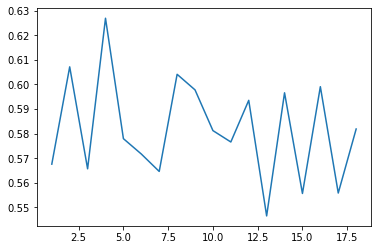

In [482]:
plt.plot(range(1,19), error_rates)

In [483]:
new_ada_model = AdaBoostRegressor(n_estimators=13)

In [484]:
new_ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=13)

In [487]:
new_ada_preds = new_ada_model.predict(X_test)

In [488]:
r2_score(y_test, new_ada_preds)

0.42577084448415836

In [455]:
gradient= GradientBoostingRegressor()
run_model(gradient, X_train, y_train, X_test, y_test)

RMSE: 232.023518776017
MAE: 146.5387294752279
r2_score: 0.5738800598621425


In [456]:
ada = AdaBoostRegressor()
run_model(gradient, X_train, y_train, X_test, y_test)

RMSE: 232.44453886876462
MAE: 146.65829605826872
r2_score: 0.5723322182632311


# Create new dataframe without features that do not impact price

In [4]:
small_df = pd.read_csv('data/final_apartment.csv')

In [5]:
small_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry on site,no laundry on site,w/d hookups,w/d in unit,attached garage,carport,detached garage,off-street parking,street parking
0,1327,1204,3,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,789,585,1,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,1576,1360,2,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
3,925,744,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1310,726,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1525,965,2,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1763,1180,689,1,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1764,1165,707,1,1.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
1765,1205,840,2,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [6]:
small_df.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', 'attached garage', 'carport',
       'detached garage', 'off-street parking', 'street parking'],
      dtype='object')

In [7]:
columns_to_drop = ['smoking_allowed', 'wheelchair_access', 'cats_allowed', 'dogs_allowed', 'street parking', 'carport', 'w/d hookups', 'no laundry on site']

In [8]:
small_df = small_df.drop(columns=columns_to_drop)

In [9]:
small_df

,price,sqfeet,beds,baths,electric_vehicle_charge,comes_furnished,laundry on site,w/d in unit,attached garage,detached garage,off-street parking
0,1327,1204,3,2.0,0,0,0,0,0,0,0
1,789,585,1,1.0,0,0,1,0,0,0,0
2,1576,1360,2,2.0,0,0,0,1,0,0,0
3,925,744,1,1.0,0,0,0,0,0,0,0
4,1310,726,1,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1762,1525,965,2,2.0,0,0,0,0,0,0,0
1763,1180,689,1,1.0,0,0,0,0,0,0,0
1764,1165,707,1,1.0,0,0,0,1,0,0,0
1765,1205,840,2,1.0,0,0,1,0,0,0,0


<AxesSubplot:>

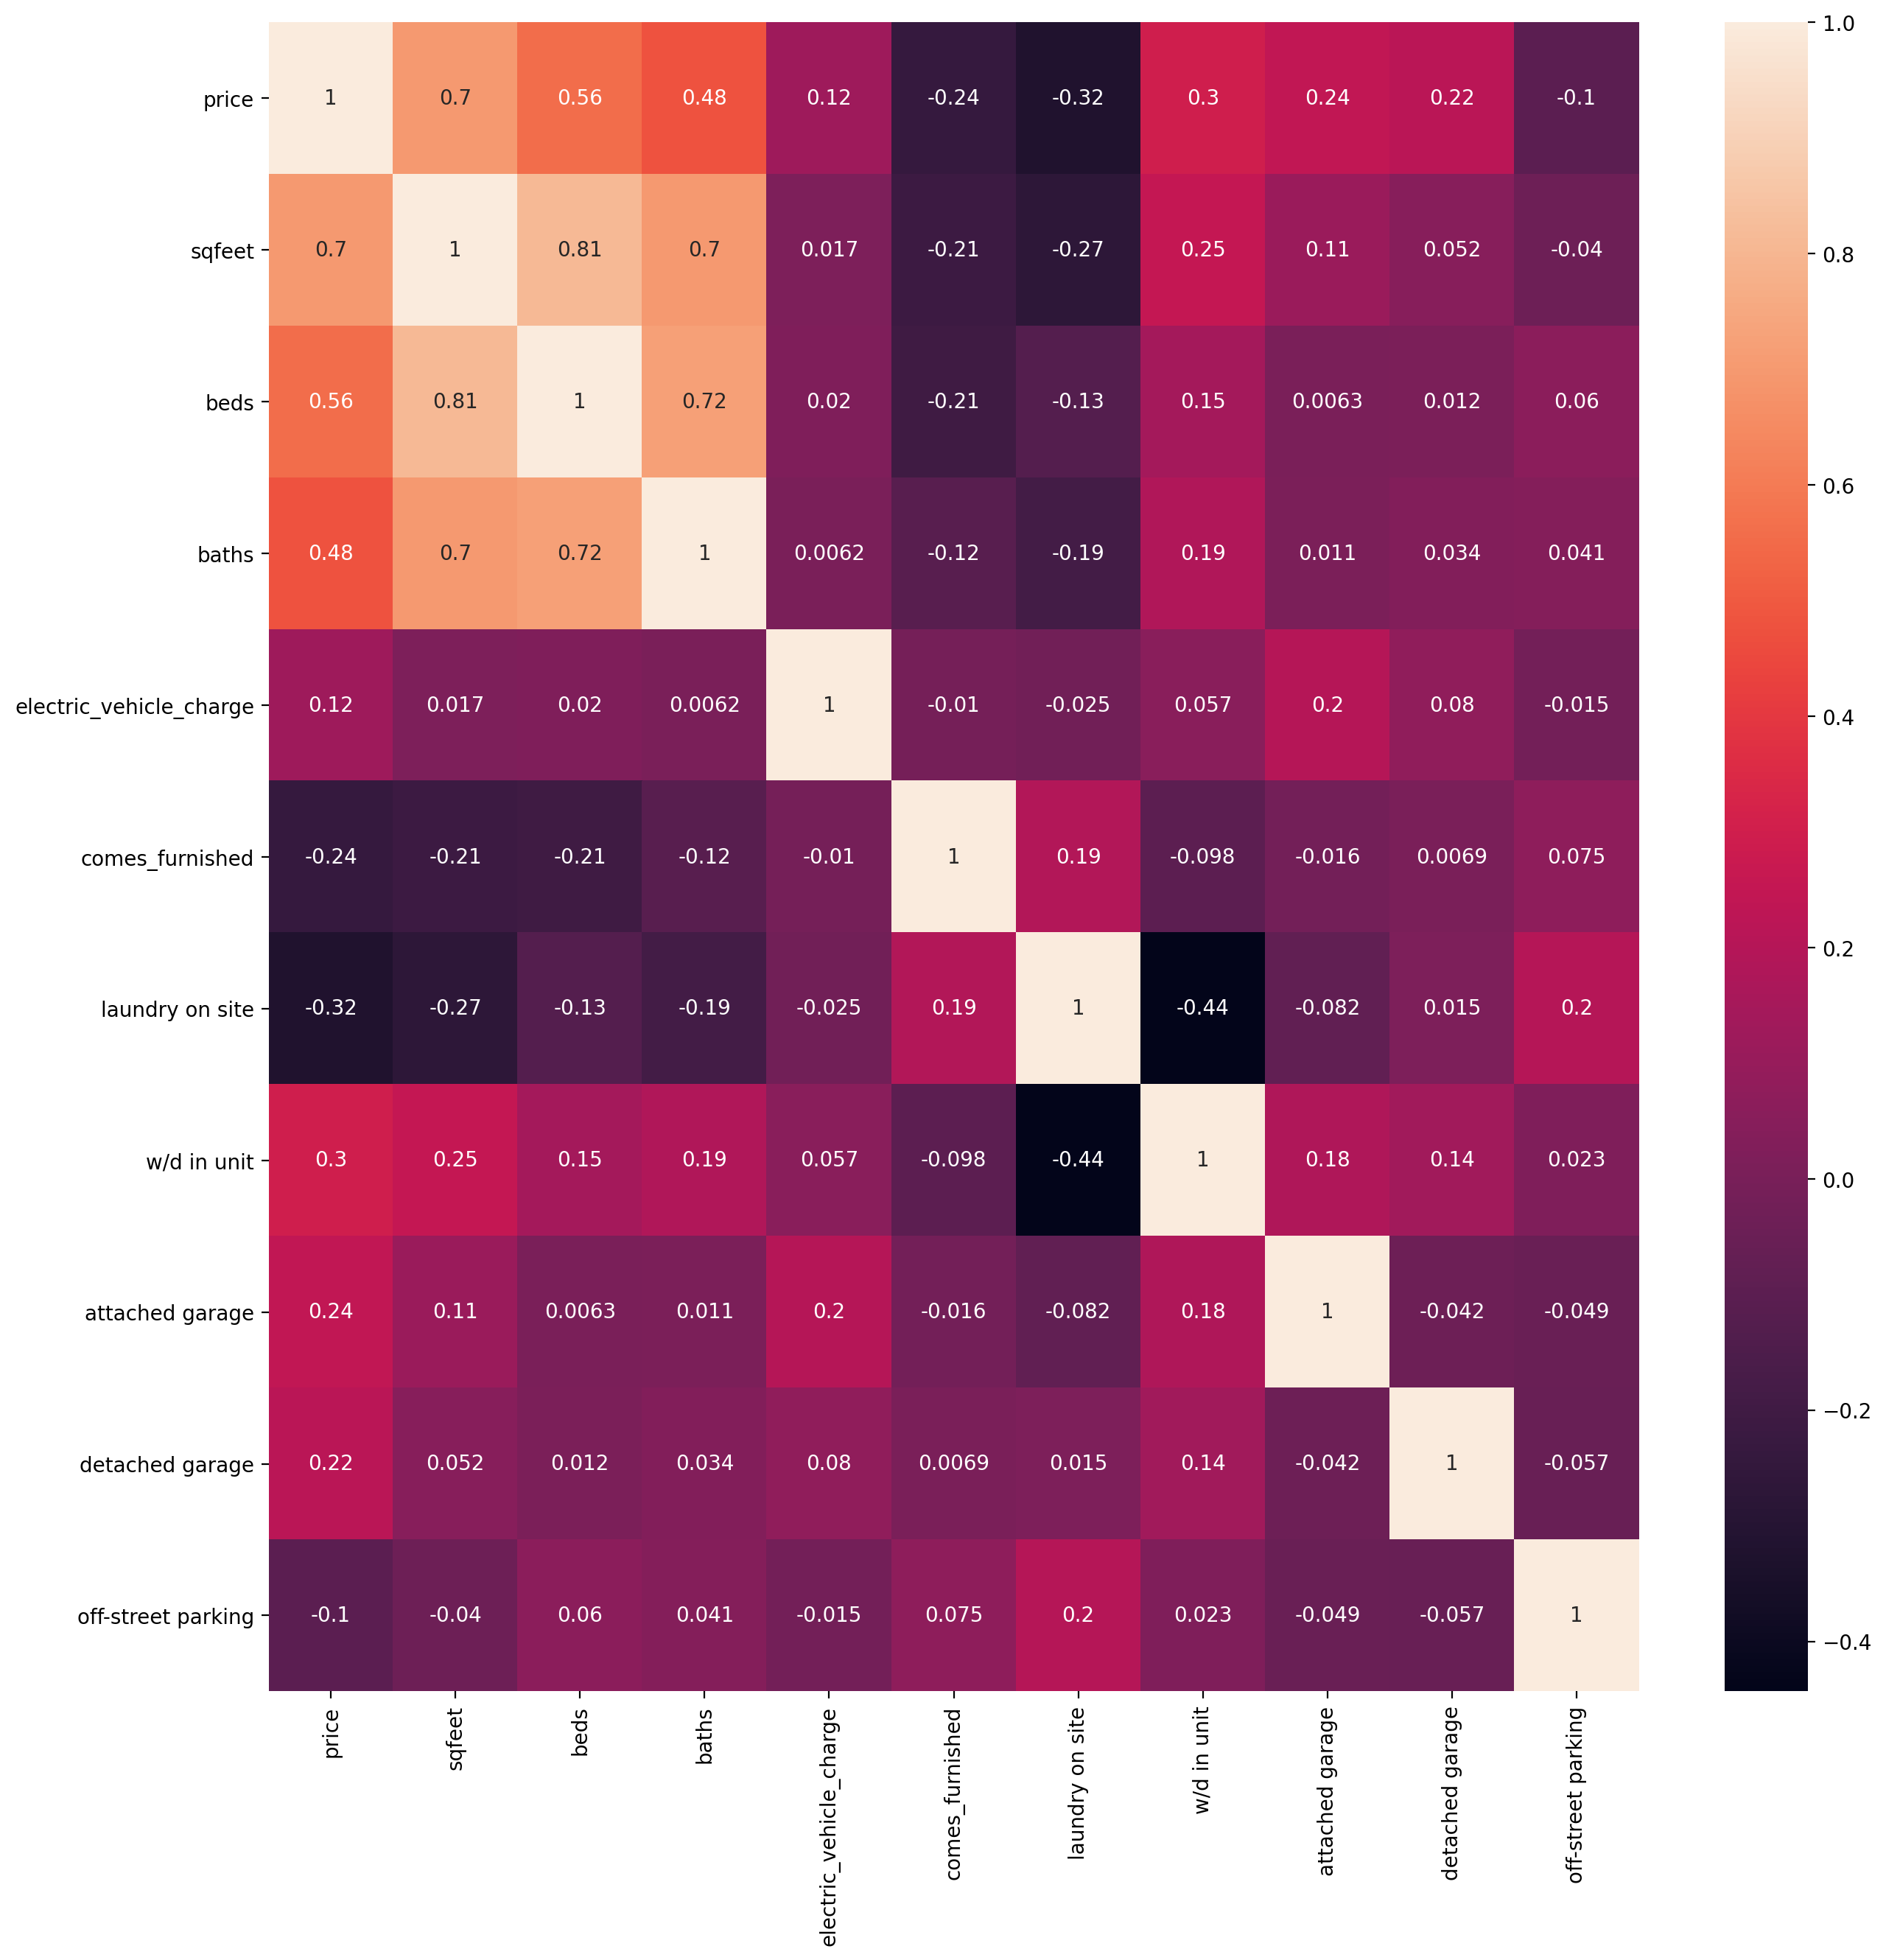

In [10]:
plt.figure(figsize=(15,15), dpi=200)
sns.heatmap(data=small_df.corr(), annot=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
X = small_df.drop('price', axis=1)
y = small_df['price']

In [16]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split( X, y, test_size=0.30, random_state=42)
# Create Evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [17]:
rand_forest = RandomForestRegressor(random_state=42)

## Initial random forest

In [68]:
n_estimators = [90, 95, 100, 105, 110, 115]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]
min_samples_leaf = [1,5,10,20,30,40,50,60]

In [69]:
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
             'bootstrap': bootstrap, 'oob_score': oob_score, 'min_samples_leaf': min_samples_leaf }

new_grid = {'n_estimators': n_estimators, 'max_features': ['sqrt']}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(rand_forest, param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5070 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.9min finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             n_estimators=110,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50, 60],
                         'n_estimators': [90, 95, 100, 105, 110, 115],
                         'oob_score': [True, False]},
             scoring='r2', verbose=1)

In [73]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 110,
 'oob_score': True}

In [74]:
base_preds = grid.predict(X_eval)

In [96]:
# Create model based off of base grid params
final_forest = RandomForestRegressor(random_state=42, **grid.best_params_)

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [77]:
r2_score(y_eval, base_preds)

0.6139315528890785

In [78]:
mean_absolute_error(y_eval, base_preds)

117.18748636063405

In [80]:
np.sqrt(mean_squared_error(y_eval, base_preds))

211.48998897875538

### 61.17% MAE = 117.57 rmse = 211.48

In [81]:
# Final predictions on forest

In [97]:
final_forest.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=110, oob_score=True,
                      random_state=42)

In [98]:
final_preds = rand_forest.predict(X_test)

In [99]:
r2_score(y_test, final_preds)

0.7017083471063034

In [100]:
mean_absolute_error(y_test, final_preds)

108.63452108584312

In [101]:
np.sqrt(mean_squared_error(y_test, final_preds))

173.88590062355084

## Final Predictions

* r2 70%
* MAE 108.63
* rmse(173.88)

In [32]:
from sklearn.model_selection import cross_validate

In [102]:
scores = cross_validate(final_forest, X, y, cv=10, scoring=['r2', 'neg_mean_absolute_error'], verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


In [103]:
report = pd.DataFrame(data=scores, columns=scores.keys())

In [104]:
report

,fit_time,score_time,test_r2,test_neg_mean_absolute_error
0,0.446295,0.020578,0.503259,-135.597381
1,0.442786,0.021183,0.601058,-107.147609
2,0.444052,0.019778,0.630003,-126.423003
3,0.437875,0.020526,0.554063,-131.494549
4,0.436983,0.021113,0.612995,-124.049774
5,0.443122,0.020302,0.593368,-103.744986
6,0.434585,0.021823,0.636080,-116.547539
7,0.453359,0.019285,0.588683,-135.482133
8,0.445133,0.020990,0.752158,-90.933255
9,0.443072,0.021237,0.639944,-118.968401


In [105]:
report['test_neg_mean_absolute_error'].mean()

-119.03886304488022

In [106]:
report['test_r2'].mean()

0.6111611778826935

# Train on full dataset

In [108]:
complete_forest = RandomForestRegressor(random_state=42, **grid.best_params_)

In [110]:
complete_forest.fit(X, y)

RandomForestRegressor(max_features='sqrt', n_estimators=110, oob_score=True,
                      random_state=42)

In [111]:
from joblib import load, dump

In [112]:
# save model
dump(complete_forest, 'final_model.pkl')

['final_model.pkl']

In [113]:
X.columns

Index(['sqfeet', 'beds', 'baths', 'electric_vehicle_charge', 'comes_furnished',
       'laundry on site', 'w/d in unit', 'attached garage', 'detached garage',
       'off-street parking'],
      dtype='object')

In [114]:
list(X.columns)

['sqfeet',
 'beds',
 'baths',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry on site',
 'w/d in unit',
 'attached garage',
 'detached garage',
 'off-street parking']

In [115]:
dump(list(X.columns), 'column_names.pkl')

['column_names.pkl']

In [116]:
small_df.head()

,price,sqfeet,beds,baths,electric_vehicle_charge,comes_furnished,laundry on site,w/d in unit,attached garage,detached garage,off-street parking
0,1327,1204,3,2.0,0,0,0,0,0,0,0
1,789,585,1,1.0,0,0,1,0,0,0,0
2,1576,1360,2,2.0,0,0,0,1,0,0,0
3,925,744,1,1.0,0,0,0,0,0,0,0
4,1310,726,1,1.0,0,0,0,0,0,0,0


In [117]:
# Test loaded model

In [118]:
loaded_model = load('final_model.pkl')

In [119]:
features = [1204, 3, 2.0, 0, 0, 0, 0, 0, 0, 0]

In [121]:
preditions = loaded_model.predict([features])

In [122]:
preditions

array([1334.05428571])